## First, we import the desired libraries in the start of the code

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd


C:\Users\Ajay Dhariwal\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


## Then we initialise the names of columns to pass into the imported dataset

In [2]:
column_names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

## Then we read the file from the csv into the python shell

In [3]:
df=pd.read_csv('C:/Users/Ajay Dhariwal/Desktop/Kaggle/housing prices/housing.csv', names=column_names,delimiter='\s+')

## We then start our Explory Data analysis by looking into the head of the dataset

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Then we look into the dataset to find any null values

In [ ]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## There are no null values in the dataset. We now look into the boxplots of the data for each variable

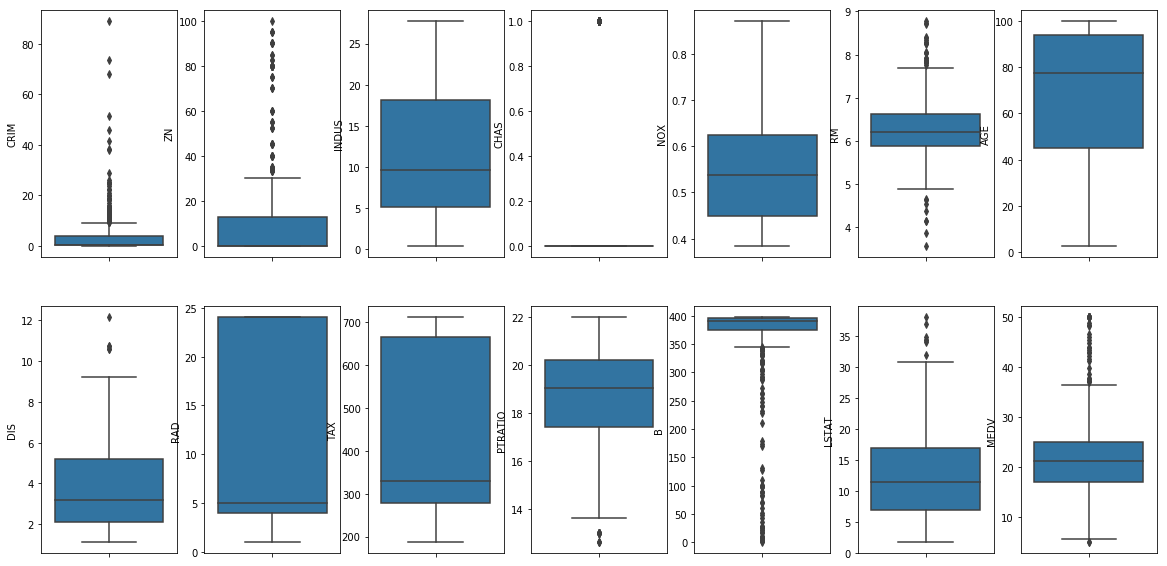

In [ ]:
fig1,ax=plt.subplots(nrows=2,ncols=7,figsize=(20,10))
ax=ax.flatten()
start=0
for i,j in df.items():
    sns.boxplot(y=j,ax=ax[start])
    start+=1

## There are outlier values in the dataset which can affect the model

In [ ]:
## We now look for the percentage of outliers in the dataset

### df.items() returns a list of tuples as [(index, values as series1), (index2,value as series2) and so on) . 
### Then we iterate over the list of tuples to get the values which are a series to get the quantiles using the quantile funciton  series.quantile(0.25) .
####  Then we find the inter quartile range and any points lying outside the inter quartile range are outliers
##### We store outliers by writing a pythonistic code. 
##### Now the outlier will store the values as the for loop continues as a series of tuples. 
#### Now we will need to take the 1st element of every tuple to get the number of outliers in every column

In [ ]:
for i, j in df.items():
    q1=j.quantile(0.25)
    q3=j.quantile(0.75)
    iqr=q3-q1
    outlier=j[(j>=1.5+iqr) | (j<=1.5-iqr)]
    perc= (np.shape(outlier)[0]*100)/np.shape(df)[0]
    print("Column %s outliers = %.2f%%" % (i, perc))

Column CRIM outliers = 20.75%
Column ZN outliers = 24.51%
Column INDUS outliers = 37.94%
Column CHAS outliers = 100.00%
Column NOX outliers = 100.00%
Column RM outliers = 100.00%
Column AGE outliers = 70.95%
Column DIS outliers = 29.45%
Column RAD outliers = 26.09%
Column TAX outliers = 43.48%
Column PTRATIO outliers = 100.00%
Column B outliers = 97.43%
Column LSTAT outliers = 49.01%
Column MEDV outliers = 95.85%


C:\Users\Ajay Dhariwal\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ajay Dhariwal\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Ajay Dhariwal\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Ajay Dhariwal\Anaconda3\lib\site-packages\matplotlib\axes\_ba

C:\Users\Ajay Dhariwal\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Ajay Dhariwal\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\Ajay Dhariwal\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ajay Dhariwal\Anaconda3\lib\site-packages\matplotlib\cbo

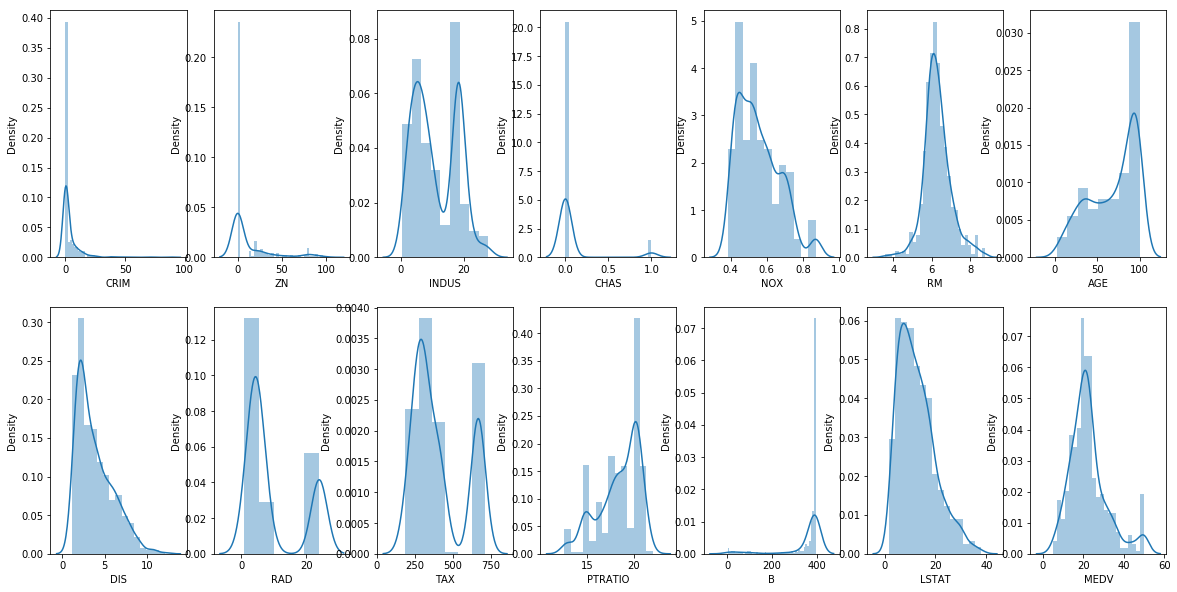

In [ ]:
    fig2,ax2=plt.subplots(nrows=2,ncols=7,figsize=(20,10))
    start=0
    ax2=ax2.flatten()
    for i, j in df.items():
        sns.distplot(j,ax=ax2[start])
        start+=1

# The columns CRIM, ZN,B are highly skewed distributions . 
## INDUS, CHAS,TAX seem to have a bimodal distribution
### MEDV seems to have an approximate normal distribution. 

## Let's remove the max and min values from the dataset for the columns CRIM, ZN and B which are highly skewed distributions

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df_1=df[~df['MEDV'].isin([50,5])]
df_2=df_1[~df_1['CRIM'].isin([88.9762,0.00632])]
df_3=df_2[~df_2['ZN'].isin([100,0.46])]
df_4=df_3[~df_3['B'].isin([396.9,0.32])]

In [ ]:
df_4.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.00000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,3.280555,10.598361,11.302186,0.068306,0.557477,6.27127,68.968033,3.821801,9.625683,412.300546,18.441257,343.076721,12.819918,21.867213
std,7.382983,22.131516,6.912463,0.252616,0.117565,0.65610,28.344059,2.136309,8.702026,167.059082,2.198597,102.086816,6.704125,7.915099
min,0.009060,0.000000,1.220000,0.000000,0.385000,3.56100,2.900000,1.178100,1.000000,187.000000,12.600000,2.520000,1.980000,6.300000
25%,0.089210,0.000000,5.190000,0.000000,0.453000,5.89050,46.025000,2.111050,4.000000,285.500000,17.000000,358.177500,7.545000,16.850000
50%,0.290225,0.000000,9.900000,0.000000,0.538000,6.20950,78.950000,3.184000,5.000000,334.500000,18.850000,386.800000,11.730000,21.050000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.59450,93.575000,5.188425,24.000000,666.000000,20.200000,393.247500,16.955000,24.775000
max,73.534100,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.420000,36.980000,48.800000


# We have dropped 140 rows to remove the max and min values from the most skewed distributions from our dataset

C:\Users\Ajay Dhariwal\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ajay Dhariwal\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Ajay Dhariwal\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Ajay Dhariwal\Anaconda3\lib\site-packages\matplotlib\axes\_ba

C:\Users\Ajay Dhariwal\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Ajay Dhariwal\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Ajay Dhariwal\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\Ajay Dhariwal\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be re

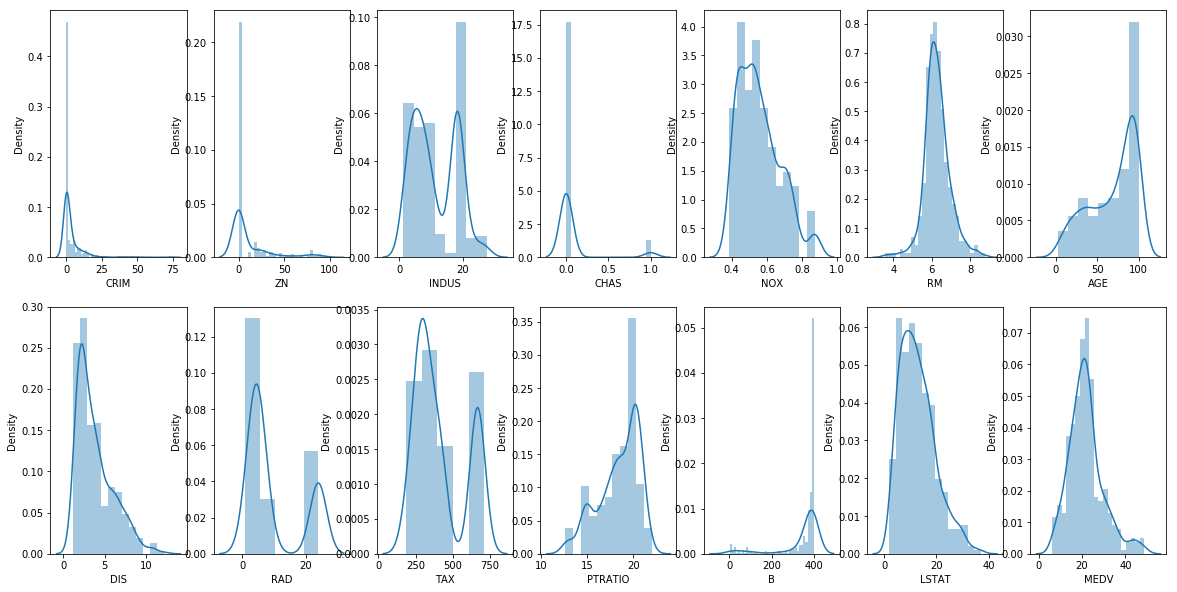

In [ ]:
fig3,ax3=plt.subplots(nrows=2,ncols=7,figsize=(20,10))
ax3=ax3.flatten()
start=0
for i,j in df_4.items():
    sns.distplot(j,ax=ax3[start])
    start+=1

# Now, we look into the pairwise correlations of all the variables with target variable

In [ ]:
sns.pairplot(df_4,)
plt.show()

In [ ]:
corr_=df_4.corr().abs()

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_,annot=True,vmin=0.21,vmax=1,cmap='BLues')

    #### From correlation matrix, we see TAX and RAD are highly correlated features. The columns LSTAT, INDUS, RM, TAX, NOX, PTRATIO has a correlation score above 0.5 with MEDV which is a good indication of using as predictors. Let's plot these columns against MEDV.

In [ ]:
fig4,ax4=plt.subplots(nrows=2,ncols=4,figsize=(20,10))
ax4=ax4.flatten()
start=0
col=['LSTAT','INDUS','RM','DIS','CRIM','TAX','NOX','PTRATIO']
for i in col:
    for k,l in df_4.items():
        if k==i:
            sns.scatterplot(x='MEDV',y=l,data=df_4,ax=ax4[start],hue='MEDV')
            start+=1

In [ ]:
from sklearn import preprocessing

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()

In [ ]:
x=df_4.loc[:,col]
y=df_4['MEDV']

# Now, we may try different pre preocessing techniques available in sklearn to learn about each of them 


# Standard Scaler

## Notes about Standard Scaler 
1. Useful when the feature follows a normal-like distribution, not so much otherwise                                
        
2. Scales the features to have zero mean and standard deviation of one, to give it a feel and properties of standard normal distribution.

### It does not perform well on features that have outliers. 

### It does not perform on features that have outliers. 

3. Does not change the shape of the distribution 

4. It is basically shifting the distribution of the variable from one point to another. i.e. to a mean of zero and standard deviation of 1. 

5. For each feature X, we calculate the mean and standard deviation 

6. For each value in feature Xi, we calculate the z value which is                                                  x-mean/standard deviation 

7. Now, every new z value calculated Is the scaled value. The mean of all the new scaled values will be 0. StandardScaler has shifted the mean to 0 and standard deviation of 1. 

8. Now, the values are scaled to a normal distribution and all the values now lie in 
[-3sigma to +3sigma]



## First, we divide our dataset into training and testing sample using train_test split available in sklearn

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

## We import the Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

# Now we apply the fit_transform method on the scaler.
This is a mix of two steps in 1 step. 
1. In step-1, we apply the fit method in which the scaler fits the data and gets the mean and dtandard deviation of all the variables in the dataset. 
2. In step 2, we scale the features of the distribuition with every variable having unit mean and unit standard deviation 
3. In place of these two steps, we apply the one step i.e. fit_transform method

In practice, we need to have separate training and testing dataset and that is where having a separate fit and transform method helps. We apply fit on the training dataset and use the transform method on both - the training dataset and the test dataset. Thus the training, as well as the test dataset, are then transformed(scaled) using the model parameters that were learned on applying the fit method to the training dataset.

In [ ]:
x_scaled=scaler.fit_transform(x_train)

In [ ]:
df_scaled=pd.DataFrame(x_scaled,columns=col)

We plot the variable LSTAT before and after applying the Standard Scaler. We observe that no change in the distribution of the variable. Only scaling has been done. It it as if a variable has been shifted from one point to other in the space without any change in the underlying distribution of the variable. 


In [ ]:
fig7,ax7=plt.subplots(nrows=2,ncols=1,figsize=(10,5))
ax7=ax7.flatten()
sns.kdeplot(x_train['LSTAT'],label='before standardscaler',ax=ax7[0])
sns.kdeplot(df_scaled['LSTAT'],label='after standardscaler',ax=ax7[1],color='orange')

In [ ]:
print(ax7.shape)

Since our dataset has variables that are skewed and should be converted into approximate standard distributions, we look for other preprecessing techniques available in sklearn 

# MinMaxScaler
1. Scales the range of features between [0,1]
2. Could work well on data that is not normally distributed.
3. It does not perform well on features that have outliers. 
4. Does not change the shape of the distribution


##  MinMaxScaler does not work well on the features that have outliers. This is because the Xmax in the denominator of the formula skews the distribution and thus a big value of Xmax has a big impact on the scaling. 

#### For each feature X, we calculate the minimum value(Xmin) and the maximum value(Xmax) 
#### For each value in that feature X, we find
Xi-Xmin/Xmax-Xmin

## Now we will fit the Min max Scaler on the training dataset and transform the variables using the applied method
### In practise, we use the min max scaler on the training dataset and transform the training and testing dataset wirth the same. We do not fit the test data to the method in machine learning project. 

## Now, we import the MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

### Now, we fit the MinMaxScaler and tranform the dataset
After that, we will look the impact of the MinMax Scaler on the distributions of any variable to see weather the MinMaxScaler changes the distribution of the variable or not. 

In [ ]:
scaler_minmax=MinMaxScaler()
x_scaled_minmax=scaler_minmax.fit_transform(x_test)

In [ ]:
dd=pd.DataFrame(x_scaled_minmax,columns=col)

In [ ]:
fig8, ax9=plt.subplots(nrows=2,ncols=1,constrained_layout=True)
ax9=ax9.flatten()
sns.kdeplot(x_test['LSTAT'], label='before MinMaxScaler',ax=ax9[0])
sns.kdeplot(dd['LSTAT'],label='after MinMaxScaling',ax=ax9[1],COLOR='ORANGE')

### Now,we see that MinMaxScaler has created no impact on the distribution of the varibale. This means that the outliers and the skewness in the distribution is still there in the data and this will impact the machine learning model

Next we look for other pre precessing modules available in the sklearn module. 

# Robust Scaler

If your data contains many outliers, scaling using the mean and variance of the data is likely to not work very well. 
##### In these cases, you can use RobustScaler as a drop-in replacement instead. It uses more robust estimates for the center and range of your 

  #### 1. Useful when feature has marginal outliers 
    2. Subtracts the Median and not the mean 
    3. Does not takes into account Minimum and Maximum values, just takes the inter Quartile range into account 
    4. Robust Scaler is robust to outliers. 
    5. But it won't completely remove outliers 
    6. Robust scaler can be used when MinMaxscaler and StandardScaler cannot be used due to the oresence of outliers. 
    7. Does little to change the shape of the distribution 
    

### For each feature X, we calculate the Median (Xmd) and two Quanitles( 0.25 and 0.75) 
For each fearture in the dataset, we find the Inter Quartile Range
New Xi= ((Xi-Xmd)/InterQuartile Range) 

## Now, We import the Robust scaler 

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
trans_robust=RobustScaler()

In [ ]:
x_scaled_robust=trans_robust.fit_transform(x_train)

In [ ]:
df_scaled_robust=pd.DataFrame(x_scaled_robust,columns=col)

In [ ]:
x_test.head()

In [ ]:
df_scaled_robust.head(2)

In [ ]:
fig10, ax10=plt.subplots(nrows=2,ncols=1,constrained_layout=True)
ax10=ax10.flatten()
sns.kdeplot(x_test['LSTAT'], label='before Robust Scaler',ax=ax10[0])
sns.kdeplot(df_scaled_robust['LSTAT'],label='After Robust Scaler',ax=ax10[1],COLOR='ORANGE')

### The distribution of the feature has not changed. Let's take a look at the box plots of the variables before and after the scaler

In [ ]:
fig11, ax12=plt.subplots(nrows=2,ncols=4,constrained_layout=True,figsize=(20,10))
ax12=ax12.flatten()
start=0
for i, j in x_train.items():
    sns.boxplot(j,ax=ax12[start])
    start+=1

In [ ]:
fig11, ax14=plt.subplots(nrows=2,ncols=4,constrained_layout=True,figsize=(20,10))
ax14=ax14.flatten()
start=0
for i, j in df_scaled_robust.items():
    sns.boxplot(j,ax=ax14[start])
    start+=1

Since we had outliers so we ise the Robust scaler for the prediction model




# Linear Model 

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
df_4.head(2)

In [ ]:
x1=df_4.iloc[:,:-1]
y1=df_4.iloc[:,-1]

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x1,y1,test_size=0.2, random_state=22)

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
trans_robust=RobustScaler()

In [ ]:
X_train_robust=trans_robust.fit_transform(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg=LinearRegression()

In [ ]:
reg.fit(X_train_robust,y_train)

In [ ]:
predict1=reg.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score


In [ ]:
r2_score(predict1,y_test)

In [ ]:
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=col)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
axs = axs.flatten()
for i, k in enumerate(col):
    sns.regplot(y=y, x=x[k], ax=axs[i])